In [1]:
# IMDB 리뷰 데이터 셋
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500) #  어휘사전에 등록된 단어를 500개만 가져오자!, skip_top=20  상위 20개는 스킵하자!

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1]))

218 189


In [4]:
print(train_input[1])

[1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 116, 9, 35, 2, 4, 229, 9, 340, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 455, 9, 45, 43, 38, 2, 2, 398, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 2, 7, 2, 2, 349, 2, 148, 2, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 2, 98, 5, 4, 228, 9, 43, 2, 2, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 2, 228, 2, 5, 2, 2, 245, 2, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 2, 14, 9, 6, 371, 78, 22, 2, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
# 훈련 세트에서 2(어휘 사전에 없는 단어) 제외하기
for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2]
    
print(train_input[1])

[194, 194, 78, 228, 5, 6, 134, 26, 4, 8, 118, 14, 394, 20, 13, 119, 189, 102, 5, 207, 110, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 5, 4, 116, 9, 35, 4, 229, 9, 340, 4, 118, 9, 4, 130, 19, 4, 5, 89, 29, 46, 37, 4, 455, 9, 45, 43, 38, 398, 4, 26, 5, 163, 11, 4, 9, 194, 7, 349, 148, 15, 123, 125, 68, 15, 349, 165, 98, 5, 4, 228, 9, 43, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 228, 5, 245, 5, 4, 131, 152, 491, 18, 32, 14, 9, 6, 371, 78, 22, 64, 9, 8, 168, 145, 23, 4, 15, 16, 4, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

164.67985 126.0


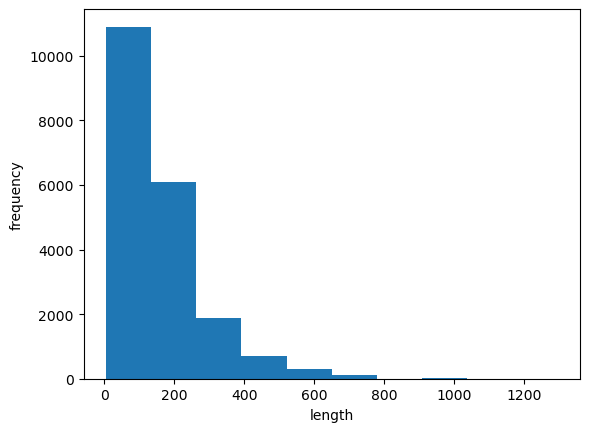

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)  #padding ='pre' ('post') 앞/ (뒤) 자르는 위치를 지정

train_seq.shape

(20000, 100)

In [12]:
train_seq[0]

array([184,  13, 384,  48,  14,  16, 147,  59,  62,  69,  12,  46,  50,
         9,  53,  74,  11,  14,  31, 151,  10,  10,   4,  20,   9, 364,
       352,   5,  45,   6,  33, 269,   8, 142,   5,  17,  73,  17, 204,
         5,  19,  55,  92,  66, 104,  14,  20,  93,  76, 151,  33,   4,
        58,  12, 188, 151,  12, 215,  69, 224, 142,  73, 237,   6,   7,
       188, 103,  14,  31,  10,  10, 451,   7,   5,  80,  91,  30,  34,
        14,  20, 151,  50,  26, 131,  49,  84,  46,  50,  37,  80,  79,
         6,  46,   7,  14,  20,  10,  10, 470, 158])

In [13]:
train_seq[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195,
        19,  49, 190,   4, 352, 183,  10,  10,  13,  82,  79,   4,  36,
        71, 269,   8,  25,  19,  49,   7,   4,  10,  10,  48,  25,  40,
        11,  40,   5,   4,  95,  14, 238,  56, 129,  10,  10,  21,  94,
       364, 352,  11, 190,  24, 484,   7,  94, 205, 405,  10,  10,  87,
        34,  49,   7, 290,  46,  48,  64,  18,   4])

In [14]:
val_seq = pad_sequences(val_input, maxlen=100)

### 순환 신경망 만들기

In [15]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics='accuracy') 

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-LSTM-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights = True)

history = model.fit(train_seq, train_target, epochs = 200, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
313/313 [==============================] - 15s 37ms/step - loss: 0.6921 - accuracy: 0.5658 - val_loss: 0.6906 - val_accuracy: 0.6168
Epoch 2/200
313/313 [==============================] - 11s 35ms/step - loss: 0.6874 - accuracy: 0.6433 - val_loss: 0.6825 - val_accuracy: 0.6744
Epoch 3/200
313/313 [==============================] - 11s 36ms/step - loss: 0.6630 - accuracy: 0.6890 - val_loss: 0.6262 - val_accuracy: 0.7304
Epoch 4/200
313/313 [==============================] - 11s 36ms/step - loss: 0.5984 - accuracy: 0.7325 - val_loss: 0.5794 - val_accuracy: 0.7424
Epoch 5/200
313/313 [==============================] - 12s 37ms/step - loss: 0.5680 - accuracy: 0.7516 - val_loss: 0.5580 - val_accuracy: 0.7496
Epoch 6/200
313/313 [==============================] - 13s 41ms/step - loss: 0.5458 - accuracy: 0.7653 - val_loss: 0.5394 - val_accuracy: 0.7628
Epoch 7/200
313/313 [==============================] - 13s 43ms/step - loss: 0.5254 - accuracy: 0.7760 - val_loss: 0.5229 - val_ac

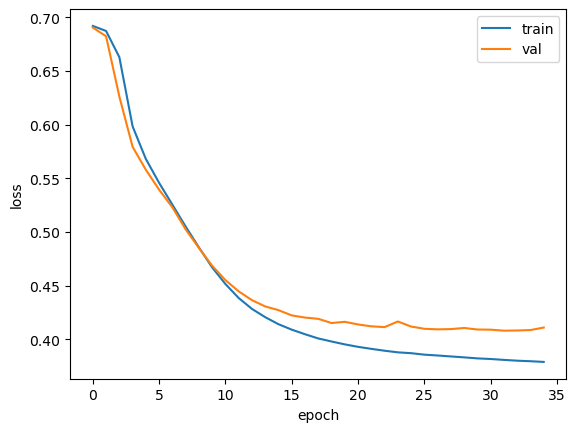

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 단어 임베딩 사용하기

In [22]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [24]:
model2.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics='accuracy') 

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embeddingRnn-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights = True)

history = model2.fit(train_seq, train_target, epochs = 200, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
313/313 [==============================] - 10s 27ms/step - loss: 0.6853 - accuracy: 0.5549 - val_loss: 0.6895 - val_accuracy: 0.5398
Epoch 2/200
313/313 [==============================] - 8s 24ms/step - loss: 0.6756 - accuracy: 0.5986 - val_loss: 0.6764 - val_accuracy: 0.5970
Epoch 3/200
313/313 [==============================] - 9s 27ms/step - loss: 0.6550 - accuracy: 0.6707 - val_loss: 0.6528 - val_accuracy: 0.6786
Epoch 4/200
313/313 [==============================] - 8s 25ms/step - loss: 0.6299 - accuracy: 0.7236 - val_loss: 0.6313 - val_accuracy: 0.7150
Epoch 5/200
313/313 [==============================] - 8s 25ms/step - loss: 0.6067 - accuracy: 0.7520 - val_loss: 0.6168 - val_accuracy: 0.7190
Epoch 6/200
313/313 [==============================] - 7s 23ms/step - loss: 0.5855 - accuracy: 0.7675 - val_loss: 0.5909 - val_accuracy: 0.7572
Epoch 7/200
313/313 [==============================] - 8s 25ms/step - loss: 0.5657 - accuracy: 0.7818 - val_loss: 0.5789 - val_accuracy

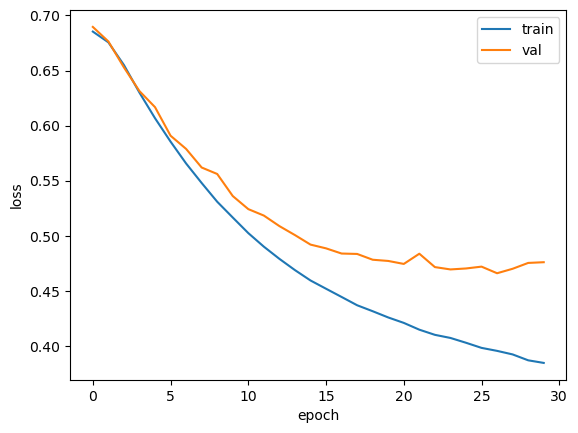

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()